In [5]:
import pandas as pd
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import sys
import os
import pickle

In [6]:
def split_date(date_string):
    if isinstance(date_string, str):
        date_string = [s for s in date_string]
        date_string.insert(4,"-")
        date_string.insert(7,"-")

        return "".join(date_string)
    else:
        date_string = str(date_string)
        date_string = [s for s in date_string]
        date_string.insert(4,"-")
        date_string.insert(7,"-")

        return "".join(date_string)
    
    
def plot_func(array, col_to_plot='close', dim=(3,2), figsize=(22,15), title='Дневные цены закрытия (акции)', color='blue'):
    with plt.style.context('seaborn-whitegrid'):
    
        fig, axs = plt.subplots(dim[0],dim[1], figsize=(22,15))

        for i, ax in zip(array, axs.flatten()):
            ax.set_title(mapping[i], fontsize=18, pad=5)
            data[i][col_to_plot].plot(ax=ax, color=color)
            ax.set_xlabel('')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    fig.suptitle(title, fontsize=30)
    plt.show()

In [7]:
def max_envelope(ts):
    for idx in range(1,len(ts)-1):
        if ts[idx] >= ts[idx-1] and ts[idx] >= ts[idx+1]:
            return ts[idx]
    
def min_envelope(ts):
    for idx in range(1,len(ts)-1):
        if ts[idx] <= ts[idx-1] and ts[idx] <= ts[idx+1]:
            return ts[idx]
        

In [45]:

data = {}
for i in os.listdir('./data'):
    df = pd.read_csv(os.path.join('./data', i))
    df.columns = ['ticker', 'per', 'date', 'time', 'open', 'high', 'low', 'close', 'vol']
    df['date'] = df['date'].apply(split_date)
    df['date'] = pd.to_datetime(df['date'])
    df = df.set_index('date')
    try:
        df['hl'] = (np.log(df['high']) - np.log(df['low']))**2 / (4*np.log(2))
        df['return'] = ((df['close'].apply(np.log) - df['close'].shift().apply(np.log))*100)
        df['return_dot'] = df['return'] / 100
        df.dropna(inplace=True)
        df['return_sq'] = df['return'] ** 2
        df['return_abs'] = df['return'].apply(abs)
        df['pos_return'] = df['return'][df['return'] > 0]
        df['neg_return'] = df['return'][df['return'] < 0]
        
    except:
        print(i)
#         df[['open', 'high', 'low', 'close', 'vol']] = df[['open', 'high', 'low', 'close','vol']].applymap(remove_dots).applymap(float)
#         df['return'] = df['close'].pct_change()
#         df.dropna(inplace=True)
    
    data[i.split('.')[0]] = df
    

# with open('data1504.pickle', 'wb') as pp:
#     pickle.dump(data, pp)

In [38]:
mapping = {'alum':'Алюминий (тонна/доллар США)',
            'bovespa':'Индекс Bovespa',
          'brent': 'Нефть марки Brent (баррель/доллар США)',
           'bse_sensex': 'Индекс BSE SENSEX',
           'btc_usd': 'Bitcoin/Доллар США',
           'eth_usd': 'Ethereum/Доллар США',
           'eurgbr':'Евро/Британский фунт стерлинга',
           'eurrub': 'Евро/Российский рубль',
           'eurusd': 'Евро/Доллар США',
           'gold': 'Золото (унция/доллар США)',
           'imoex':'Индекс Московской Биржи',
           'lukoil':'Акции Лукойл',
           'megafon':'Акции Мегафон',
           'mts':'Акции МТС',
           'n225': 'Индекс Nikkei 225',
           'nasdaq': 'Индекс NASDAQ Composite',
           'nickel': 'Никель (тонна/доллар США)',
           'nlmk': 'Акции НЛМК',
           'nornikel': 'Акции Норильский Никель',
           'sevstal':'Акции Северсталь',
#            'plat': 'Платина',
           'rtsi':'Индекс PTC',
           'shanghai': 'Индекс Shanghai Composite',
           'silver': 'Серебро (унция/доллар США)',
           'usdrub': 'Доллар США/Российский рубль',
           'wheat': 'Пшеница (5000 бушелей/доллар США)',
#            'yandex': 'Акции Yandex'
          }

currencies = ['btc_usd', 'eth_usd', 'eurgbr', 'eurrub', 'eurusd','usdrub']
indicies = ['bovespa', 'bse_sensex', 'imoex', 'n225', 'nasdaq', 'rtsi']
stocks = ['lukoil','megafon','mts', 'nlmk','nornikel','sevstal']
commodities = ['alum', 'brent','gold','nickel', 'silver', 'wheat']

In [10]:
for d in [indicies, stocks, currencies, commodities]:
    print('------------------------------------------')
    for i in d:
        print('{}; Данные c {} по {}. Всего {} наблюдений.'.format(i,
                                                                    data[i].index[0].date(),
                                                                    data[i].index[-1].date(),
                                                                    data[i].shape[0]))

------------------------------------------
bovespa; Данные c 2002-12-20 по 2020-04-07. Всего 4474 наблюдений.
bse_sensex; Данные c 2007-10-26 по 2020-04-07. Всего 3029 наблюдений.
imoex; Данные c 2000-04-10 по 2020-04-07. Всего 4997 наблюдений.
n225; Данные c 2002-01-17 по 2020-04-07. Всего 4907 наблюдений.
nasdaq; Данные c 2000-04-10 по 2020-04-07. Всего 4985 наблюдений.
rtsi; Данные c 2000-04-10 по 2020-04-07. Всего 5008 наблюдений.
------------------------------------------
lukoil; Данные c 2000-04-10 по 2020-04-07. Всего 4998 наблюдений.
megafon; Данные c 2012-11-29 по 2019-05-29. Всего 1631 наблюдений.
mts; Данные c 2003-10-16 по 2020-04-07. Всего 4101 наблюдений.
nlmk; Данные c 2006-04-19 по 2020-04-07. Всего 3497 наблюдений.
nornikel; Данные c 2001-11-01 по 2020-04-07. Всего 4605 наблюдений.
sevstal; Данные c 2005-06-23 по 2020-04-07. Всего 3701 наблюдений.
------------------------------------------
btc_usd; Данные c 2015-07-02 по 2020-04-07. Всего 1737 наблюдений.
eth_usd; Данн

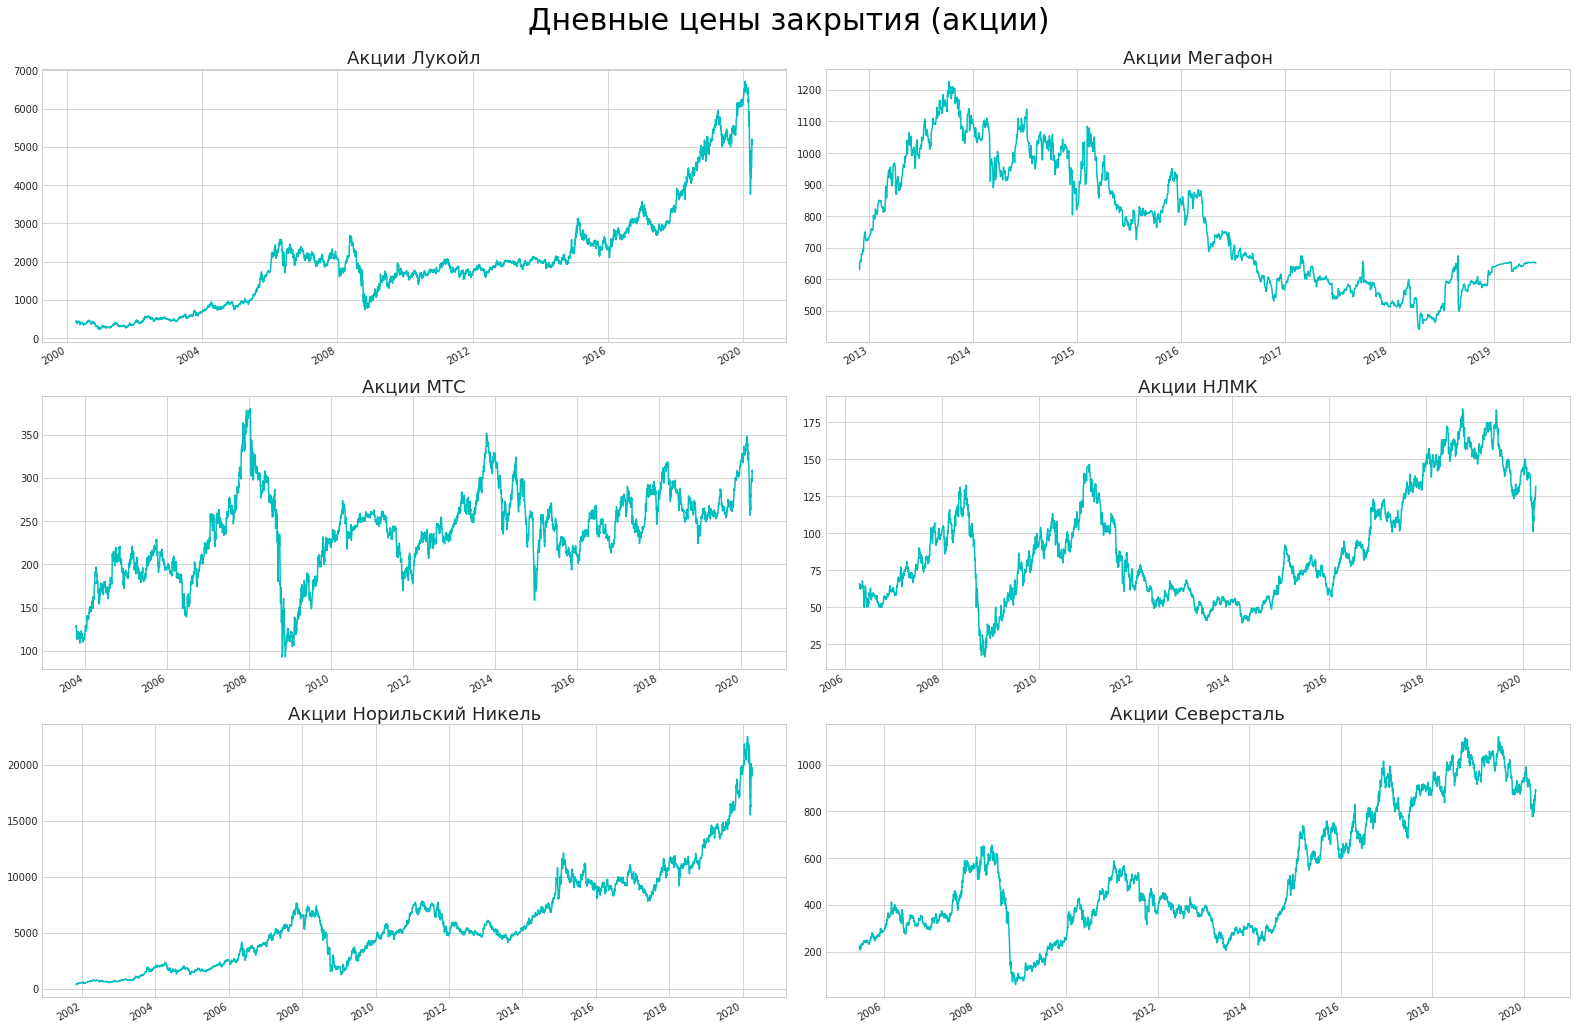

In [11]:
plot_func(stocks, dim=(3,2), figsize=(26,15), color='c')

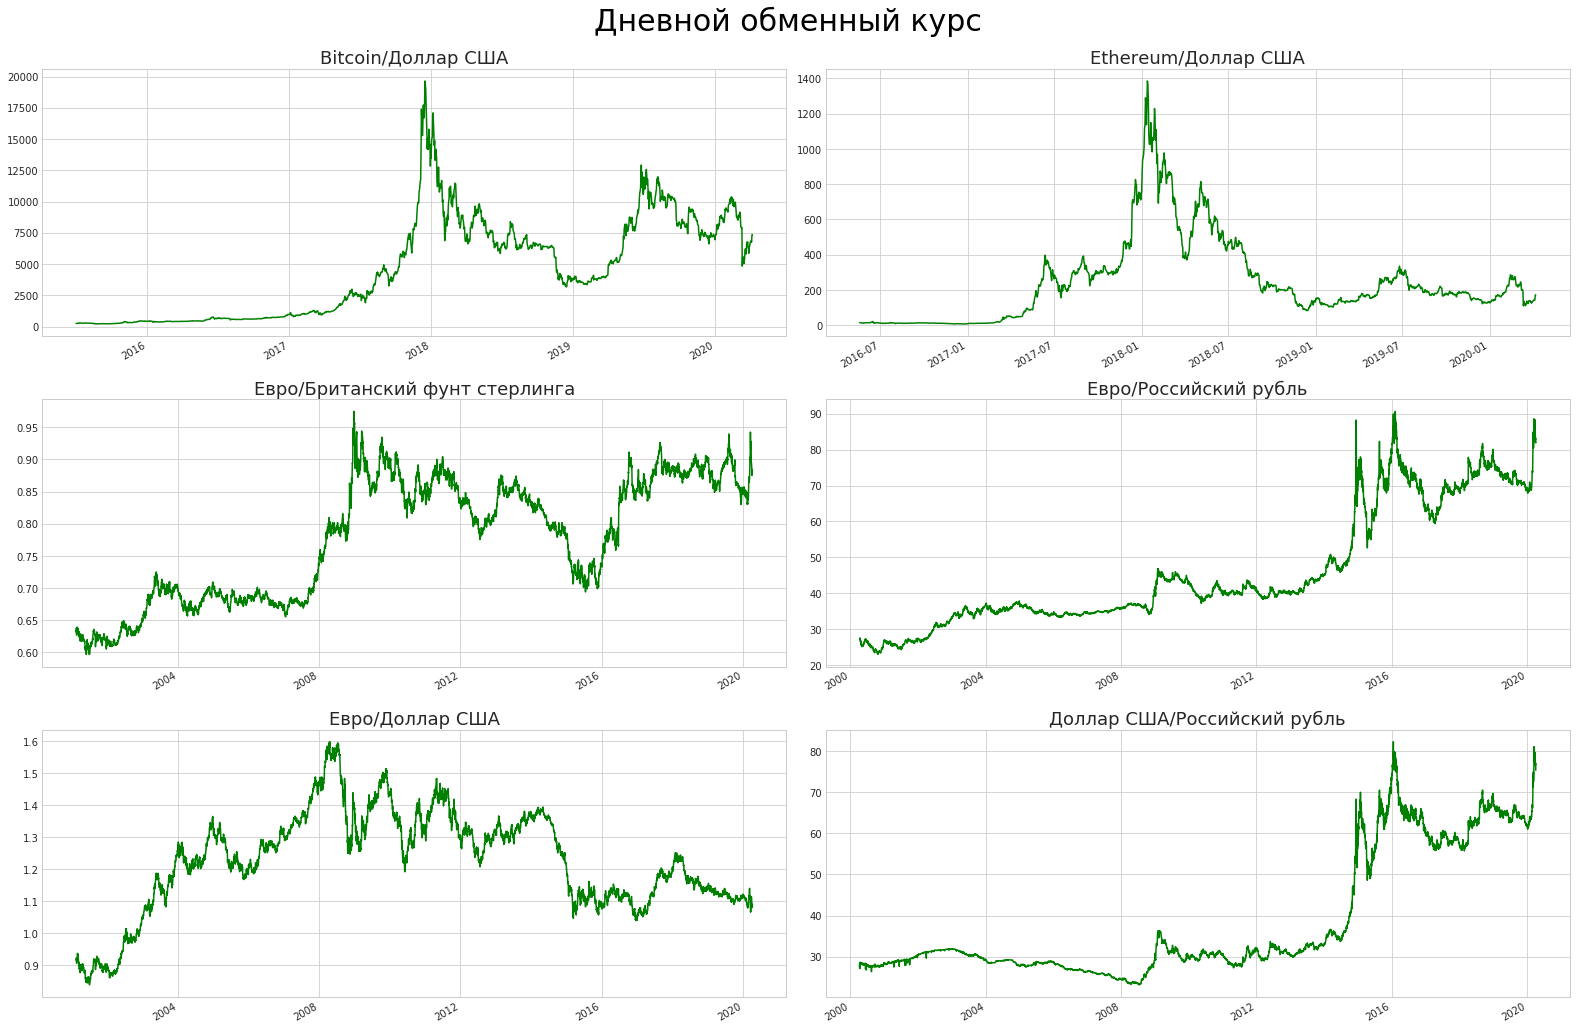

In [26]:
plot_func(currencies, title='Дневной обменный курс', color='green')

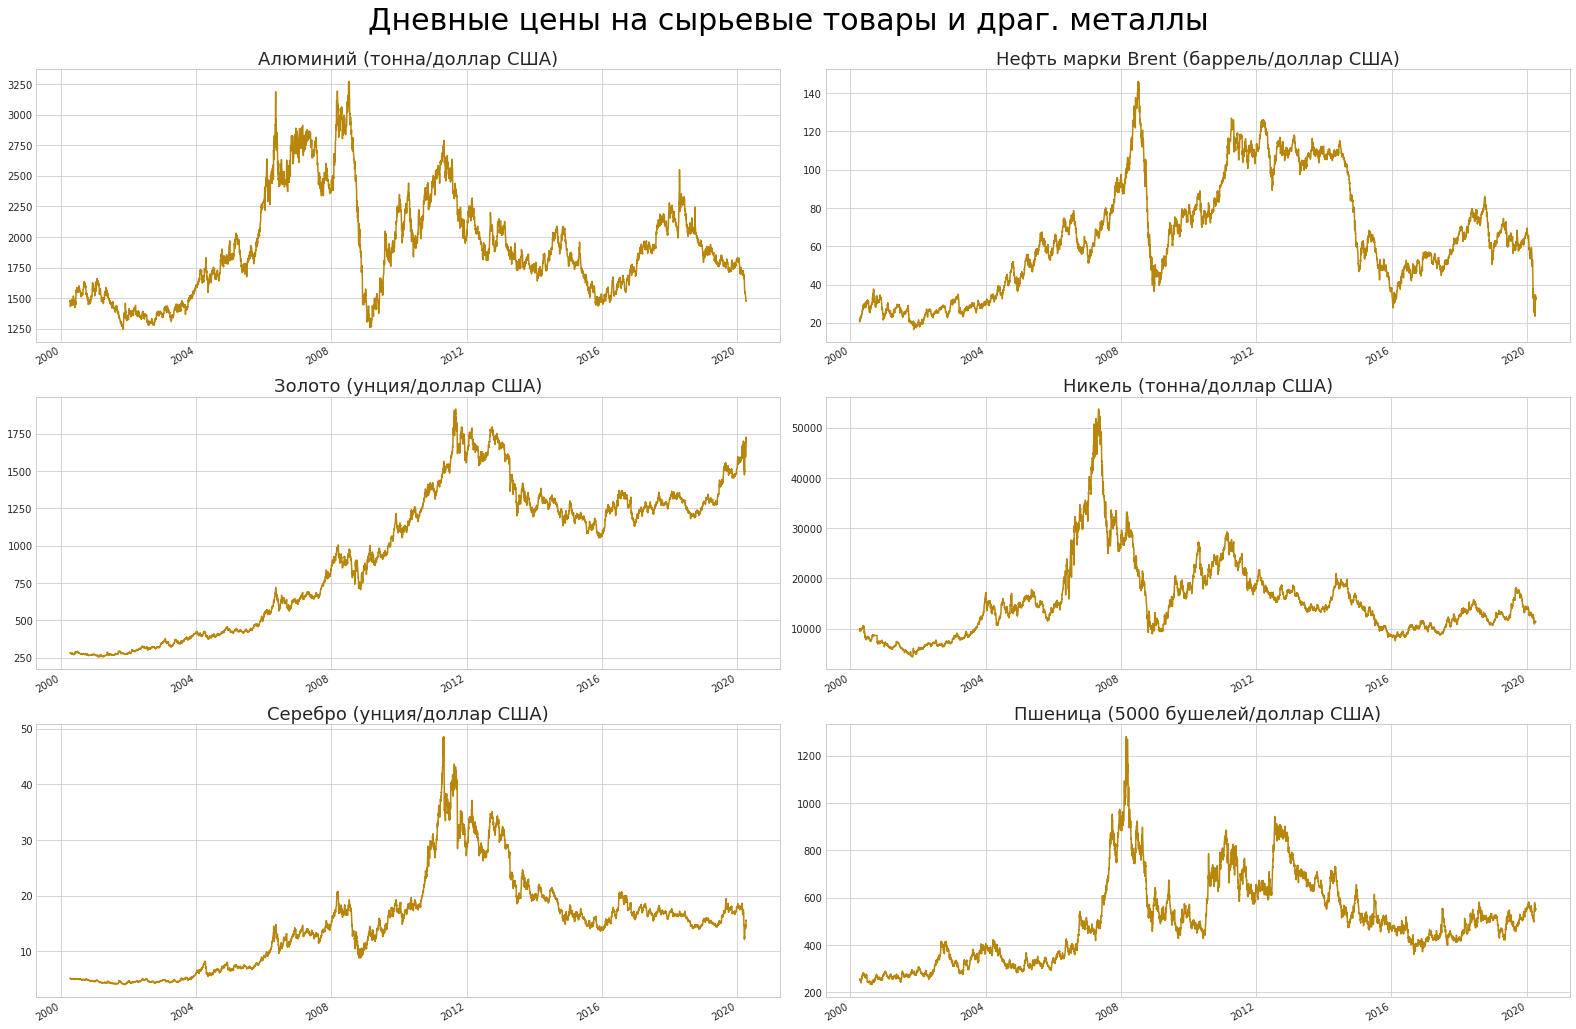

In [39]:
plot_func(commodities, title='Дневные цены на сырьевые товары и драг. металлы', color='darkgoldenrod')

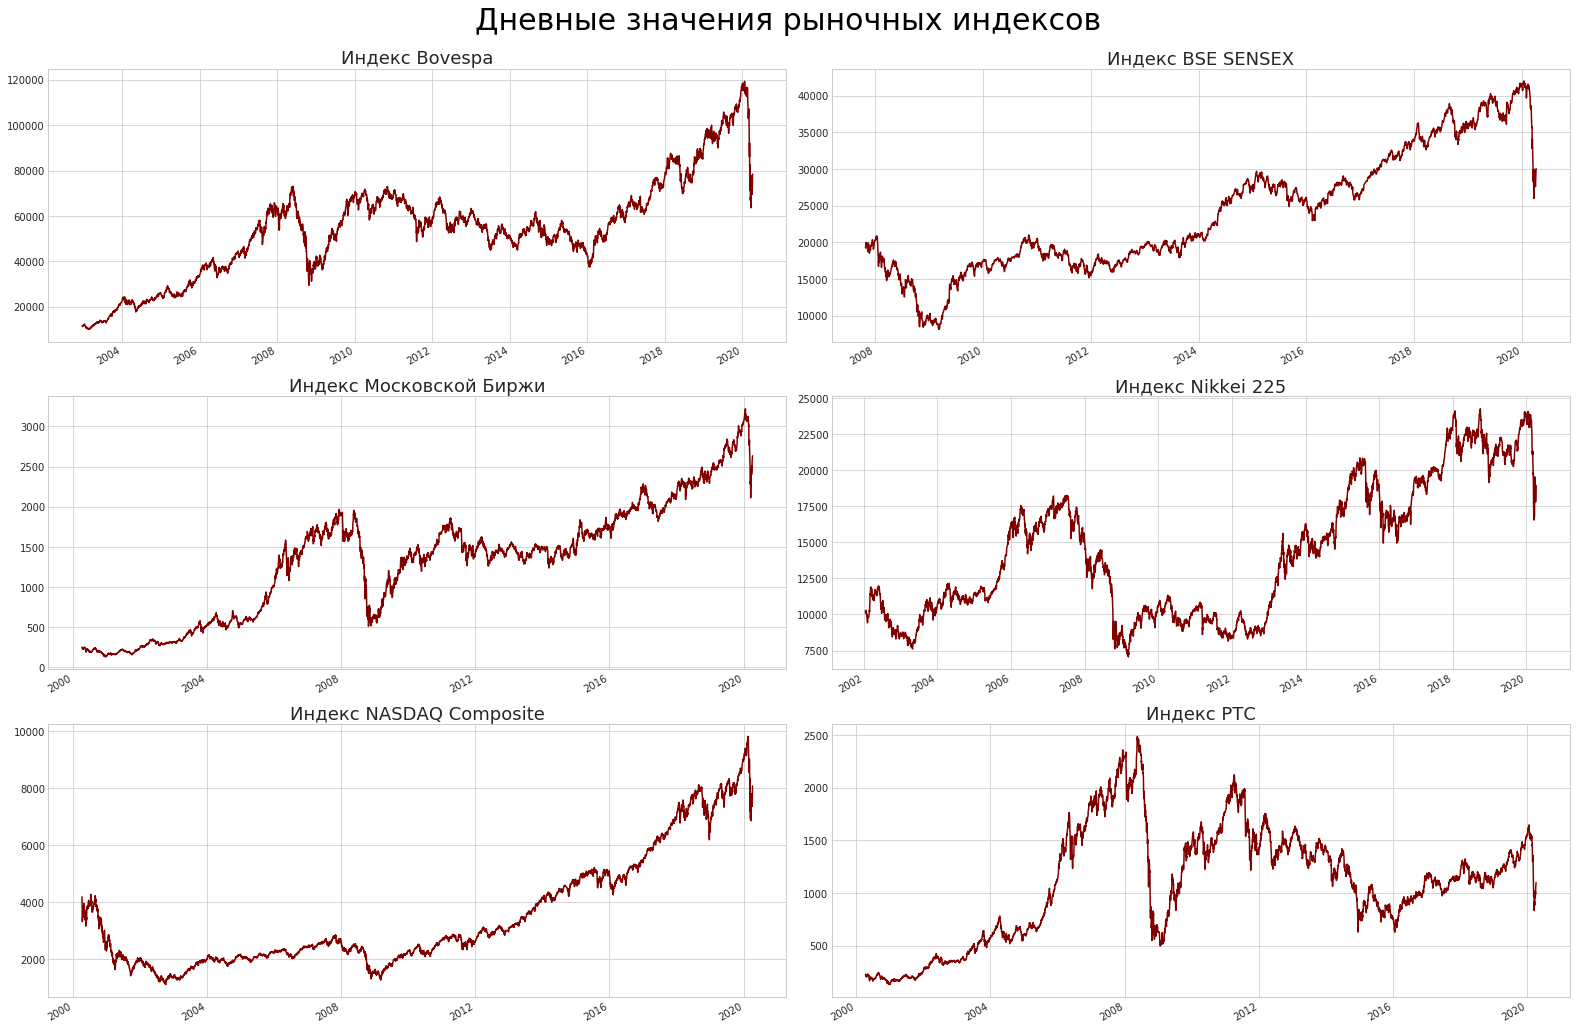

In [14]:
plot_func(indicies, title='Дневные значения рыночных индексов', color='maroon')

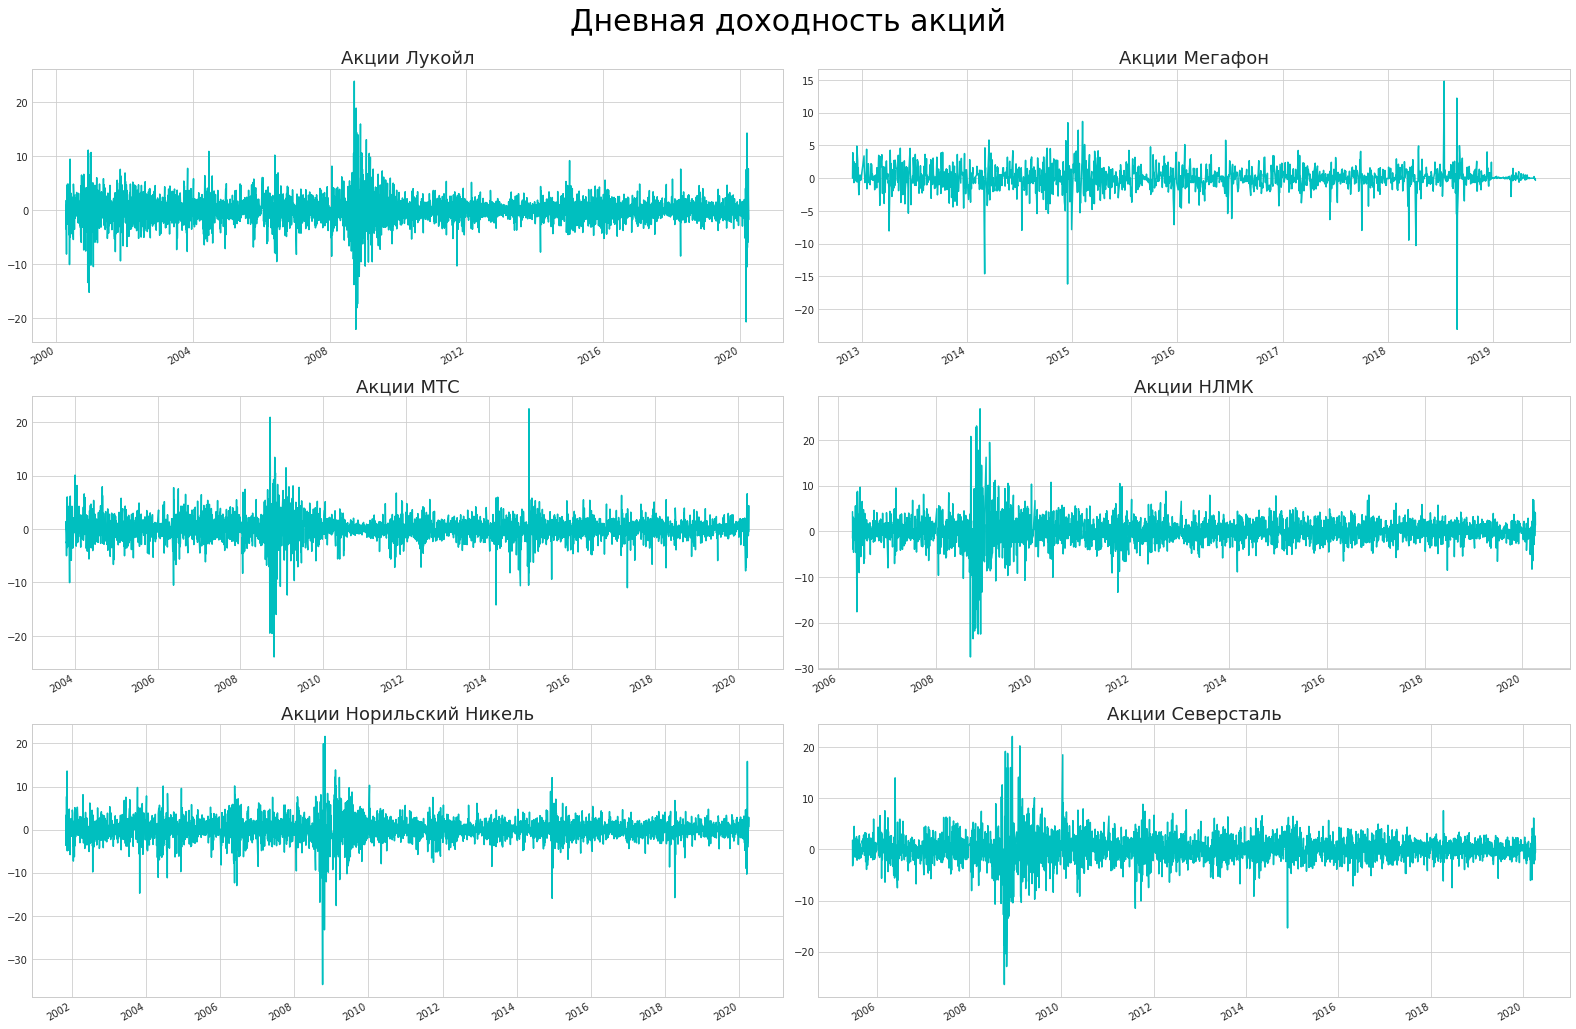

In [34]:
plot_func(stocks, col_to_plot='return', title='Дневная доходность акций', color='c')

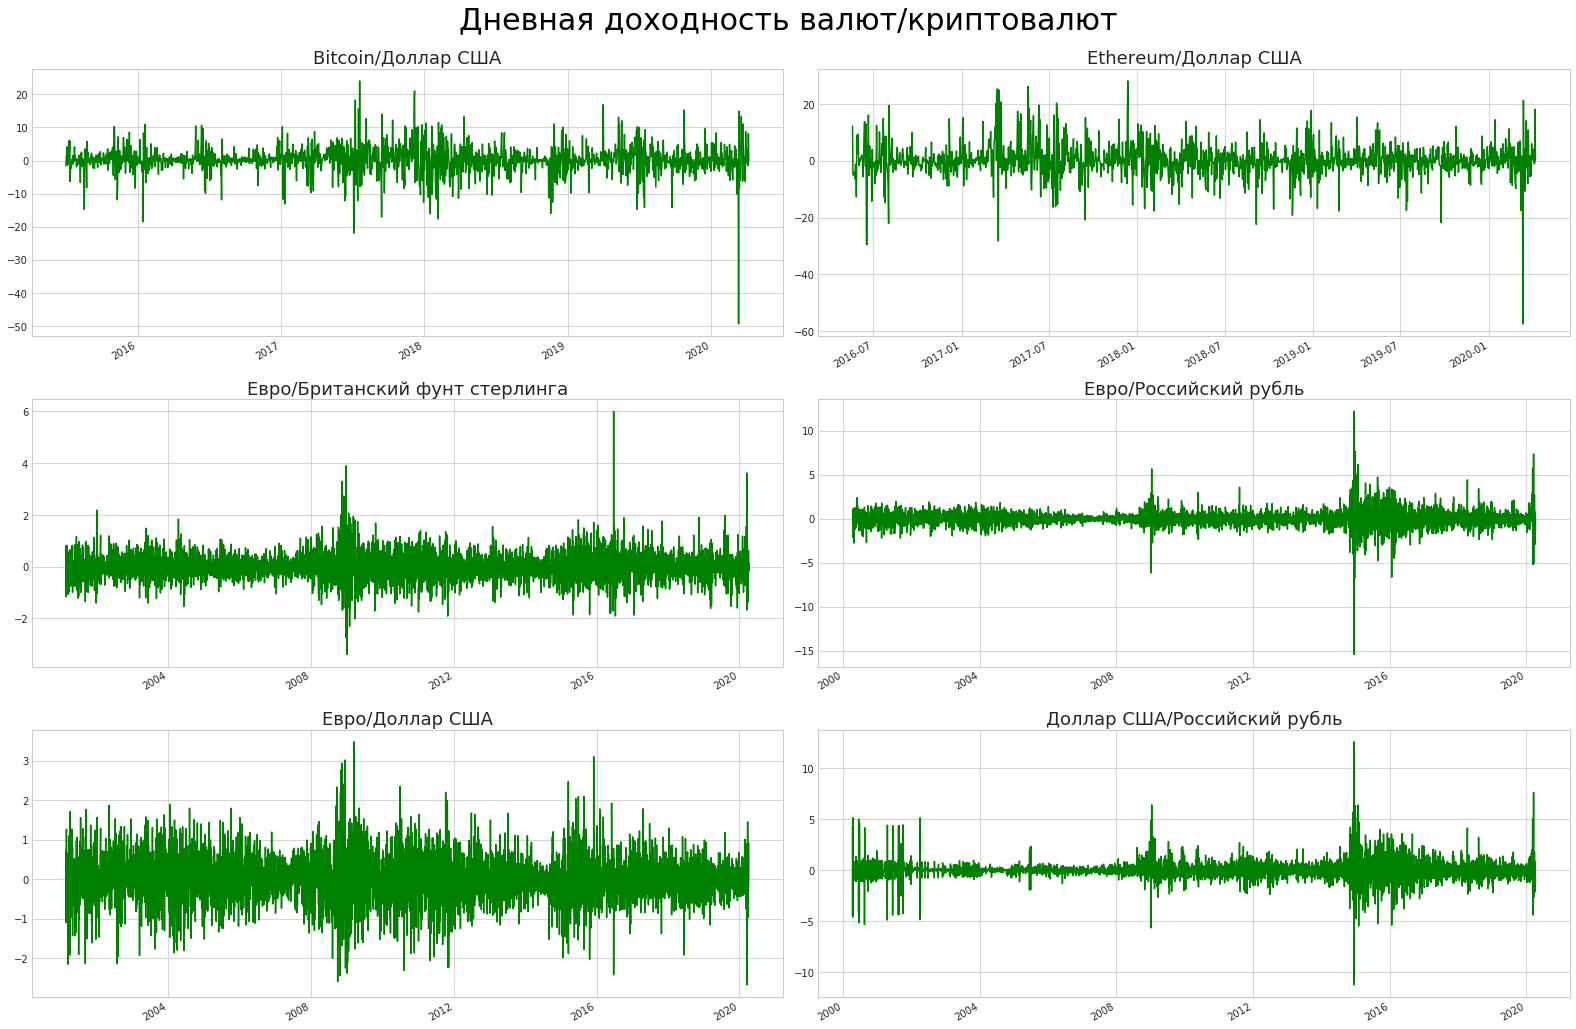

In [35]:
plot_func(currencies, col_to_plot='return', title='Дневная доходность валют/криптовалют', color='green')

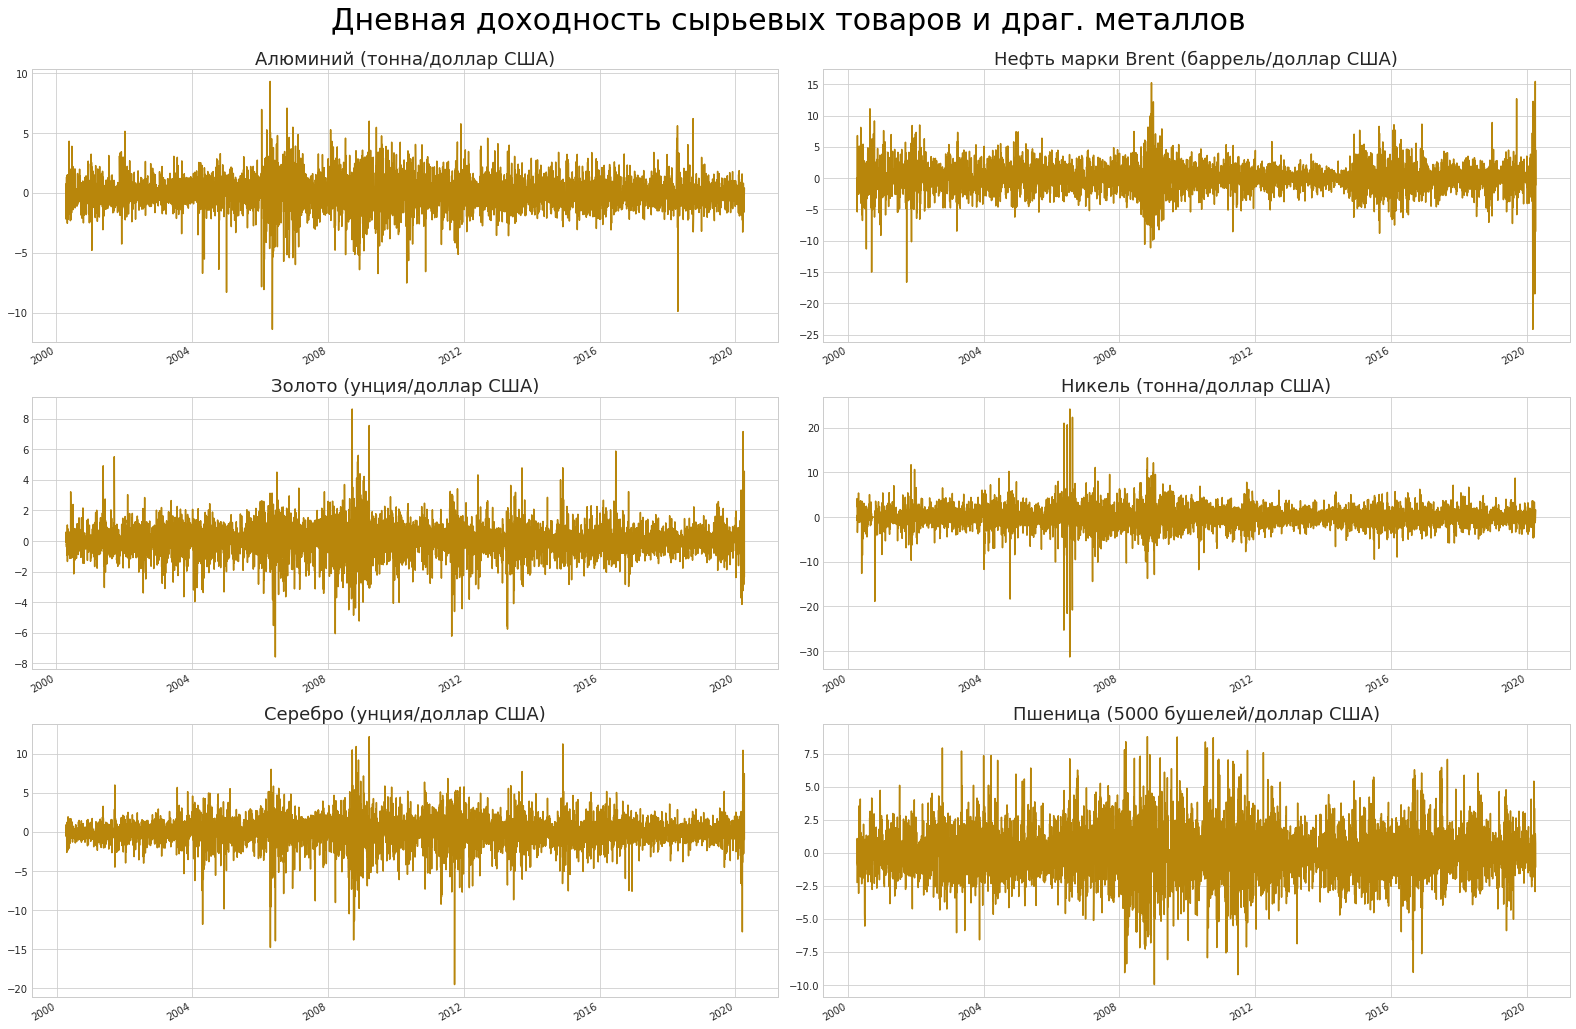

In [40]:
plot_func(commodities, col_to_plot='return', title='Дневная доходность сырьевых товаров и драг. металлов', color='darkgoldenrod')

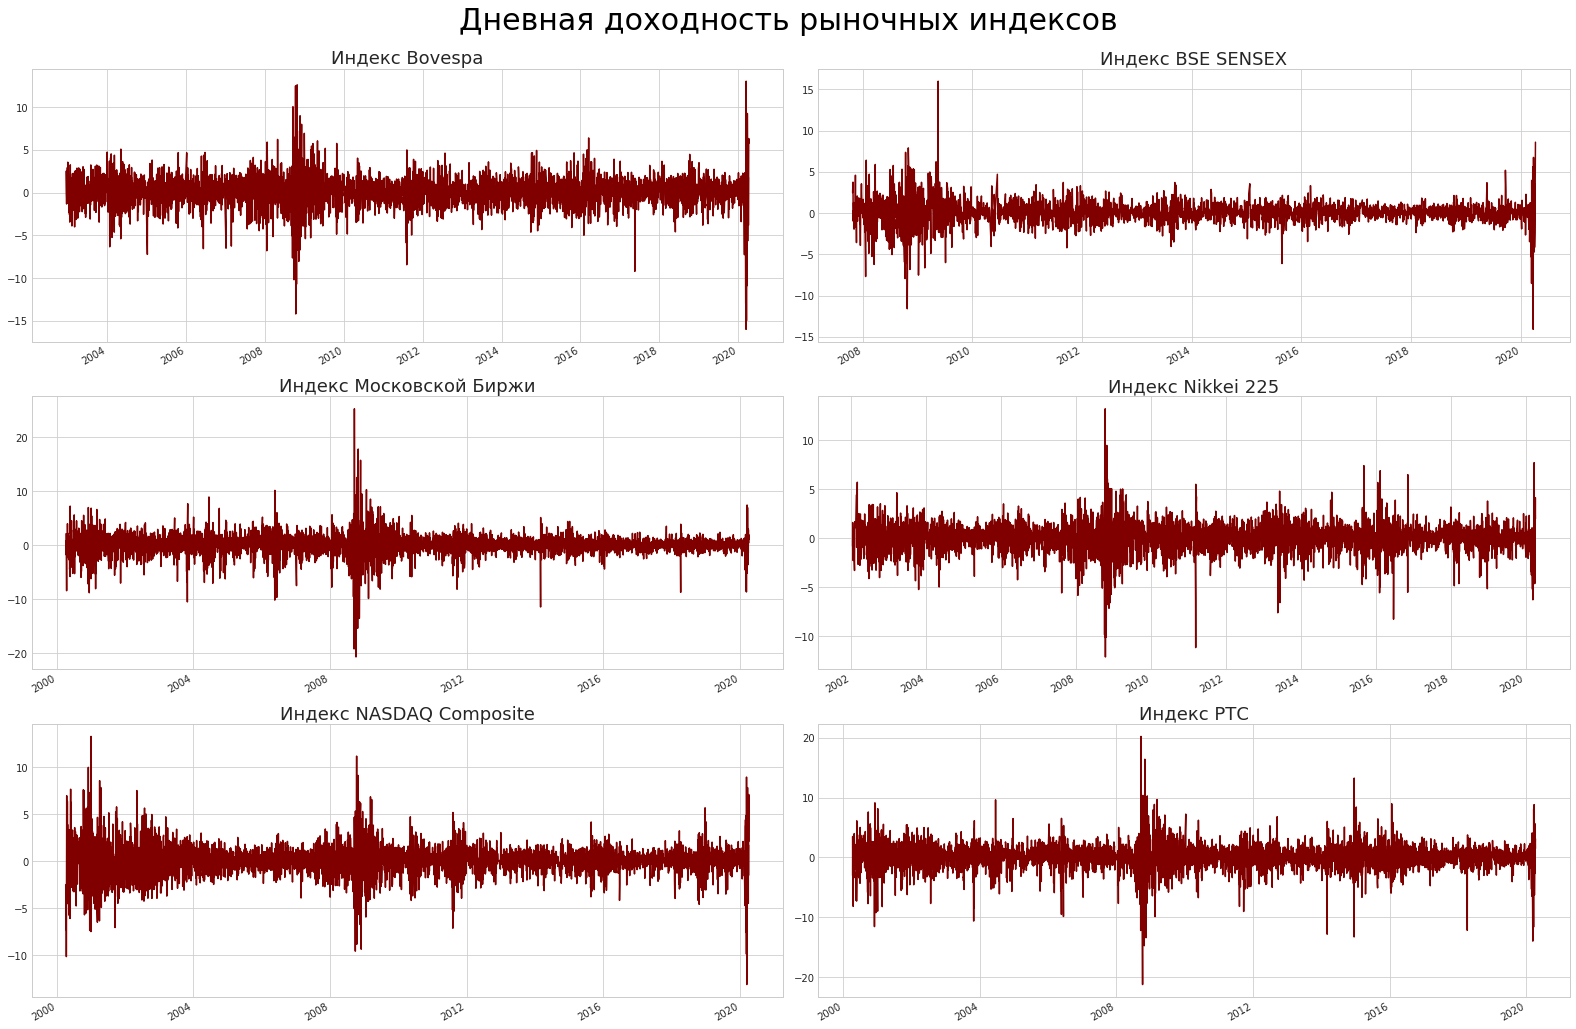

In [37]:
plot_func(indicies, col_to_plot='return', title='Дневная доходность рыночных индексов', color='maroon')

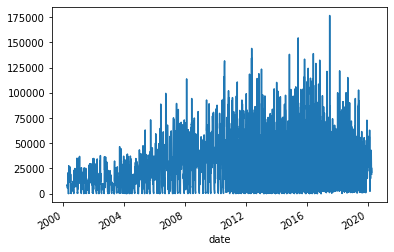

In [22]:
data['wheat'].head()